<a href="https://colab.research.google.com/github/meira2024/Proyecto_integrado_2/blob/main/TP3remeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random

# Definir el número de filas
num_filas = 100

# Generar datos aleatorios para las columnas
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Fernandez', 'Gomez', 'Garcia', 'Lopez', 'Diaz', 'Martinez', 'Sanchez'] # Agregar más apellidos si lo deseas
nombres = ['Maria', 'Jose', 'Juan', 'Ana', 'Luis', 'Pedro', 'Sofia', 'Laura', 'Carlos', 'Luisa'] # Agregar más nombres si lo deseas
dni = np.random.randint(10000000, 60000000, size=num_filas)  # Números de DNI aleatorios entre 10,000,000 y 60,000,000

# Materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Biología', 'Física', 'Química', 'Inglés', 'Educación Física', 'Arte']  # Puedes agregar o modificar las materias

# Generar datos aleatorios para las notas y las faltas
notas_1er_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))  # Notas entre 1 y 10
notas_2do_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))
notas_3er_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))
faltas = np.random.randint(0, 30, size=(num_filas, len(materias)))  # Faltas entre 0 y 30

# Crear el DataFrame
df = pd.DataFrame()
for i in range(num_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    for j, materia in enumerate(materias):
        nueva_fila = pd.DataFrame({
            'Apellido': [apellido],
            'Nombre': [nombre],
            'DNI': [dni[i]],
            'Materia escolar': [materia],
            'Nota 1er Trimestre': [notas_1er_trimestre[i, j]],
            'Nota 2do Trimestre': [notas_2do_trimestre[i, j]],
            'Nota 3er Trimestre': [notas_3er_trimestre[i, j]],
            'Faltas a clases': [faltas[i, j]]
        })
        df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar el DataFrame
df.head()

,Apellido,Nombre,DNI,Materia escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Lopez,Ana,45900255,Matemática,4,8,6,17
1,Lopez,Ana,45900255,Lengua y Literatura,4,2,1,26
2,Lopez,Ana,45900255,Historia,3,6,2,17
3,Lopez,Ana,45900255,Geografía,1,6,7,28
4,Lopez,Ana,45900255,Biología,5,2,10,27


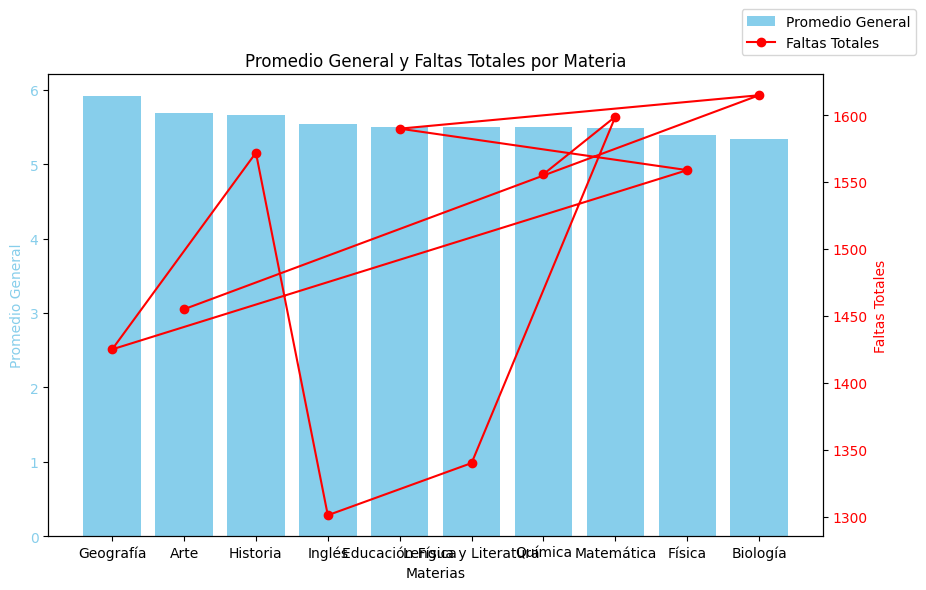

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el promedio general de cada materia
promedios_materias = df.groupby('Materia escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
promedios_materias = promedios_materias.sort_values(ascending=False)  # Ordenar de mayor a menor

# Calcular las faltas totales por materia
faltas_materias = df.groupby('Materia escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para los promedios
ax1.bar(promedios_materias.index, promedios_materias.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params('y', labelcolor='red')

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Agregar leyendas
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Título del gráfico
plt.title('Promedio General y Faltas Totales por Materia')

# Mostrar el gráfico
plt.show()